# **DESCRIPTORS GENERATION**

✅ Dataset loaded: (7906, 4)
  molecule_chembl_id                                   canonical_smiles  \
0       CHEMBL100114  COc1ccc(OCC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]2CC(=...   
1       CHEMBL100405  CC(C)C[C@H](NC(=O)COc1ccc2ccccc2c1)C(=O)N[C@H]...   
2       CHEMBL100409  CC(C)C[C@H](NC(=O)COc1c(Cl)cc(Cl)c2ccccc12)C(=...   

      pIC50 bioactivity_class  
0  5.838632          inactive  
1  5.000000          inactive  
2  5.517126          inactive  
✅ Final dataset shape: (7906, 21)
💾 Saved as Final_Descriptors_Specified_SmallGTPases.csv


C:\Users\user\AppData\Local\Temp\ipykernel_7104\3559546172.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bioactivity_class", data=updated_data, palette="Set2")


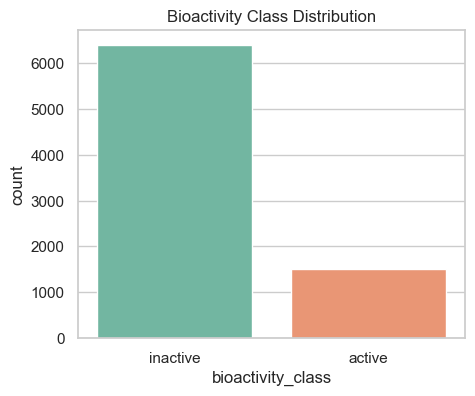

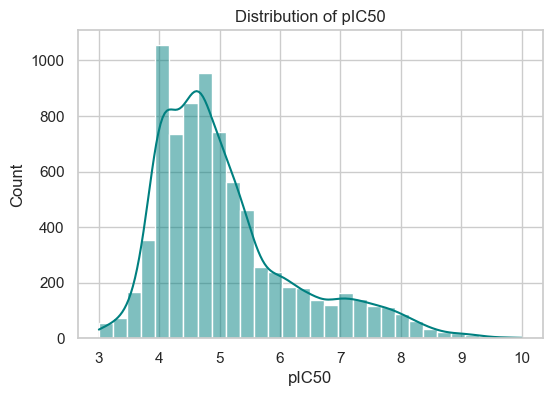

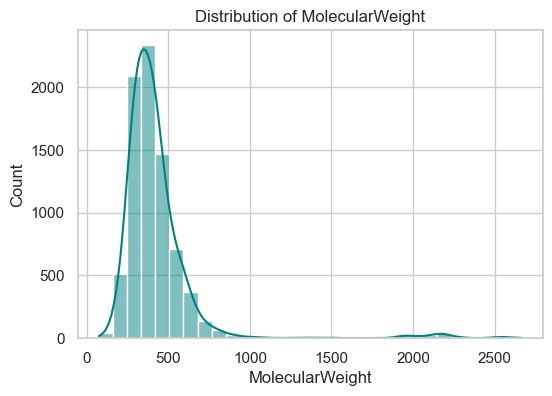

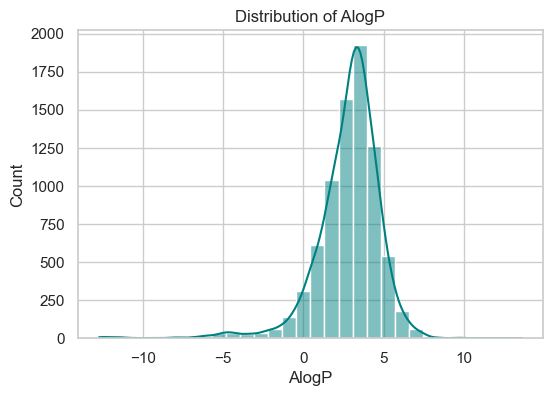

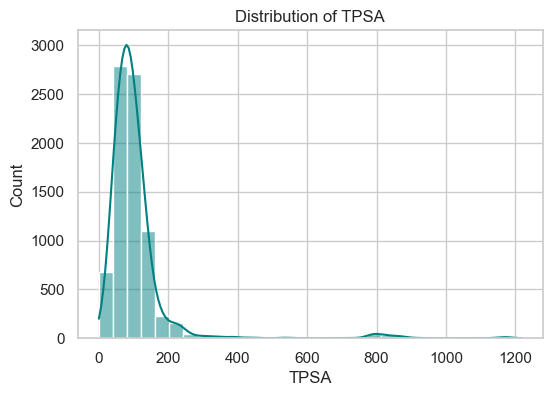

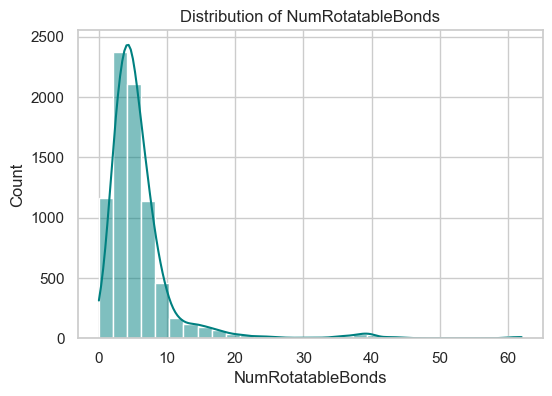

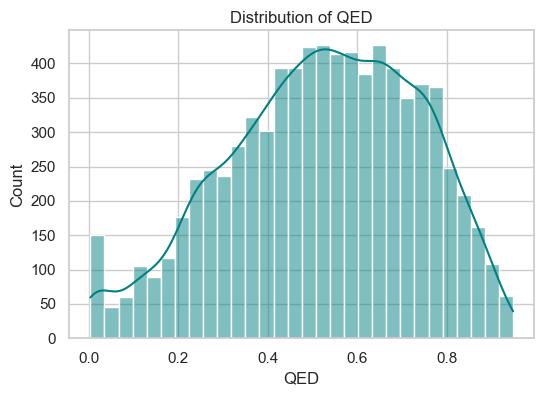

C:\Users\user\AppData\Local\Temp\ipykernel_7104\3559546172.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y=col, data=updated_data, palette="Set2")


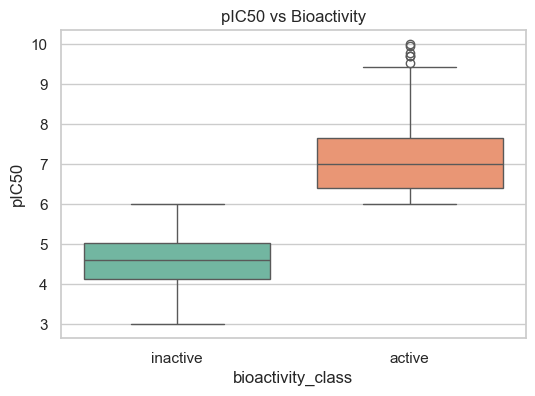

C:\Users\user\AppData\Local\Temp\ipykernel_7104\3559546172.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y=col, data=updated_data, palette="Set2")


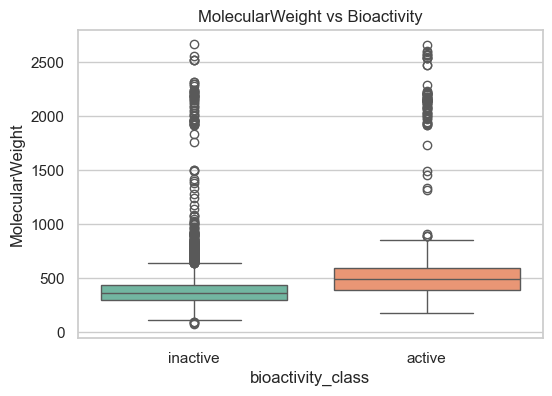

C:\Users\user\AppData\Local\Temp\ipykernel_7104\3559546172.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y=col, data=updated_data, palette="Set2")


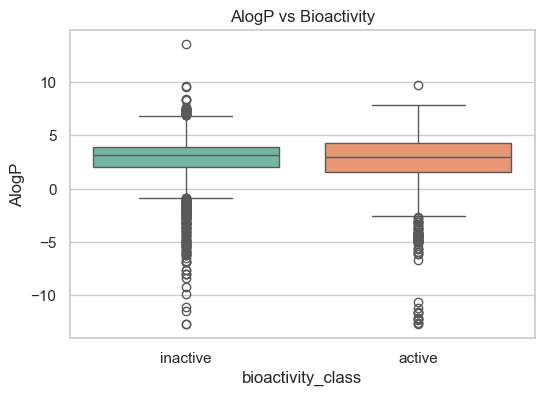

C:\Users\user\AppData\Local\Temp\ipykernel_7104\3559546172.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y=col, data=updated_data, palette="Set2")


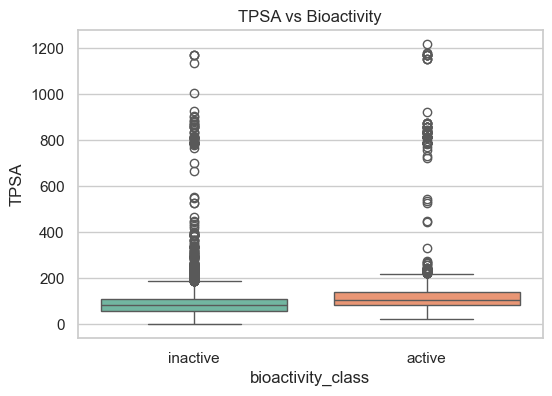

C:\Users\user\AppData\Local\Temp\ipykernel_7104\3559546172.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y=col, data=updated_data, palette="Set2")


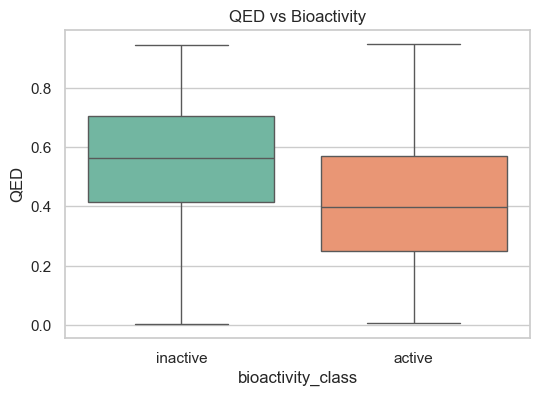

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors, rdMolDescriptors, QED

# STEP 1: Load Specified Preprocessed Dataset (binary only)
data = pd.read_csv("Small_GTPases_Binary_Preprocessed.csv")
print("✅ Dataset loaded:", data.shape)
print(data.head(3))

# STEP 2: Basic Lipinski descriptors
def lipinski(smiles):
    mols = [Chem.MolFromSmiles(s) for s in smiles]
    rows = []
    for mol in mols:
        if mol is None:
            rows.append({})
            continue
        rows.append({
            "MW": Descriptors.MolWt(mol),
            "LogP": Descriptors.MolLogP(mol),
            "NumHDonors": Lipinski.NumHDonors(mol),
            "NumHAcceptors": Lipinski.NumHAcceptors(mol)
        })
    return pd.DataFrame(rows)

# STEP 3: Extended descriptors
def calc_selected_descriptors(smiles_list):
    mols = [Chem.MolFromSmiles(s) for s in smiles_list]
    rows = []
    for mol in mols:
        if mol is None:
            rows.append({})
            continue

        # Rule of Five check
        violations = 0
        if Descriptors.MolWt(mol) > 500: violations += 1
        if Descriptors.MolLogP(mol) > 5: violations += 1
        if Lipinski.NumHDonors(mol) > 5: violations += 1
        if Lipinski.NumHAcceptors(mol) > 10: violations += 1

        rows.append({
            "MolecularWeight": Descriptors.MolWt(mol),
            "MonoisotopicMW": Descriptors.ExactMolWt(mol),
            "AlogP": Descriptors.MolLogP(mol),
            "NumRotatableBonds": Lipinski.NumRotatableBonds(mol),
            "TPSA": rdMolDescriptors.CalcTPSA(mol),
            "HBA": rdMolDescriptors.CalcNumHBA(mol),
            "HBD": rdMolDescriptors.CalcNumHBD(mol),
            "HBA_Lipinski": Lipinski.NumHAcceptors(mol),
            "HBD_Lipinski": Lipinski.NumHDonors(mol),
            "RO5_Violations": violations,
            "AromaticRings": Lipinski.NumAromaticRings(mol),
            "HeavyAtoms": Lipinski.HeavyAtomCount(mol),
            "QED": QED.qed(mol)
        })
    return pd.DataFrame(rows)

# STEP 4: Generate descriptors
df_lipinski = lipinski(data["canonical_smiles"])
df_extended = calc_selected_descriptors(data["canonical_smiles"])

# STEP 5: Merge with original binary dataset
updated_data = pd.concat([
    data[["molecule_chembl_id","canonical_smiles","pIC50","bioactivity_class"]],
    df_lipinski, df_extended
], axis=1)

# Drop invalid SMILES
updated_data = updated_data.dropna(subset=["MolecularWeight"])
print("✅ Final dataset shape:", updated_data.shape)

# Save
updated_data.to_csv("Final_Descriptors_Specified_SmallGTPases.csv", index=False)
print("💾 Saved as Final_Descriptors_Specified_SmallGTPases.csv")

sns.set(style="whitegrid")

# Class distribution
plt.figure(figsize=(5,4))
sns.countplot(x="bioactivity_class", data=updated_data, palette="Set2")
plt.title("Bioactivity Class Distribution")
plt.show()

# Key descriptor distributions
key_features = ["pIC50","MolecularWeight","AlogP","TPSA","NumRotatableBonds","QED"]
for col in key_features:
    plt.figure(figsize=(6,4))
    sns.histplot(updated_data[col], kde=True, bins=30, color="teal")
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots (active vs inactive)
for col in ["pIC50","MolecularWeight","AlogP","TPSA","QED"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="bioactivity_class", y=col, data=updated_data, palette="Set2")
    plt.title(f"{col} vs Bioactivity")
    plt.show()


In [2]:
print(data['bioactivity_class'].value_counts())


bioactivity_class
inactive    6407
active      1499
Name: count, dtype: int64
